# **DATA EXPLORATION AND VISUALIZATION**

### **1. MỤC TIÊU**
- Trực quan hóa dữ liệu 

### **2. KHAI BÁO CÁC THƯ VIỆN**
- **sys**: làm việc với các tham số dòng lệnh 
- **os**: tương tác với hệ điều hành (file, thư mục, đường dẫn)
- **pandas**: xử lý và phân tích dữ liệu dạng bảng

In [1]:
import sys
import os
import pandas as pd
import mplcursors
from pathlib import Path


### **3. IMPORT CÁC HÀM TỪ SRC VÀO**
- Lấy đường dẫn thư mục hiện tại
- Import các hàm từ các file .py trong thư mục src 


In [2]:
# Lấy đường dẫn thư mục hiện tại
project_root = os.path.abspath('..')
src_path = os.path.join(project_root, 'src')
data_path = os.path.join(project_root, 'data')
charts_dir = os.path.join(project_root, 'charts')
os.makedirs(charts_dir, exist_ok=True)
project_root_new = Path("..")
if src_path not in sys.path:
    sys.path.append(src_path)

# Tự động load lại code nếu bạn có sửa file .py trong src 
%reload_ext autoreload
%autoreload 2

# Import hàm từ file .py trong thư mục src
try:  
    from calculate_average_score import calculate_average_score, visualize_average_score_ranking
    from calculate_average_score import create_ranking_journey_table, visualize_ranking_journey, clean_rank_to_int
    print('Import các hàm từ {calculate_average_score} thành công')
except ImportError as e: 
    print(f" LỖI KHÔNG TÌM THẤY MODULE: {e}")

try: 
    from so_sanh_pho_diem_theo_khoi_19_24 import load_score_files, load_combinations, calc_combination_scores, build_all_counts, plot_and_save_khoi 
    print('Import các hàm từ {so_sanh_pho_diem_theo_khoi_19_24} thành công')
except ImportError as e: 
    print(f" LỖI KHÔNG TÌM THẤY MODULE: {e}")

try: 
    from compare_average_scores_provinces import calculate_average_scores_by_subject, visualize_subject_ranking
    print('Import các hàm từ {compare_average_scores_provinces} thành công')
except ImportError as e: 
    print(f" LỖI KHÔNG TÌM THẤY MODULE: {e}")

try: 
    from visualize_diem_thi import load_binned_scores, plot_subject_from_binned, plot_all_subjects_from_binned
    print('Import các hàm từ {visualize_diem_thi} thành công')
except ImportError as e: 
    print(f" LỖI KHÔNG TÌM THẤY MODULE: {e}")

try: 
    from source import run_full_analysis_and_draw
    print('Import các hàm từ {source} thành công')
except ImportError as e: 
    print(f" LỖI KHÔNG TÌM THẤY MODULE: {e}")   
all_subjects = ['Toán', 'Văn', 'Ngoại ngữ', 'Lí', 'Hóa', 'Sinh', 'Sử', 'Địa', 'GDCD']
danh_sach_nam = range(2019, 2025)
YEARS = [2019, 2020, 2021, 2022, 2023, 2024]
target_year = 2024
top_n = 10

Import các hàm từ {calculate_average_score} thành công
Import các hàm từ {so_sanh_pho_diem_theo_khoi_19_24} thành công
Import các hàm từ {compare_average_scores_provinces} thành công
Import các hàm từ {visualize_diem_thi} thành công
Import các hàm từ {source} thành công


### **4. TRỰC QUAN HÓA DỮ LIỆU BẢNG BIỂU ĐỒ**

### **4.1 Biểu đồ thanh ngang biểu diễn điểm thi trung bình của các tỉnh thành**

- **Câu hỏi:** Điểm trung bình của các tỉnh thành là như nhau vào mỗi năm 

- **Câu trả lời:** Chúng em muốn so sánh điểm trung bình giữa 63 tỉnh/thành theo từng năm, cho thấy sự khác biệt, mức độ đồng đều và các tỉnh có kết quả nổi bật hoặc thấp hơn mặt bằng chung.

📊 Bắt đầu tạo biểu đồ xếp hạng cho năm 2019...
Đã tạo file biểu đồ: c:\Users\MSI TUAN\Downloads\DS2\introduction-to-data-science\charts\ranking_2019_chart.png
Hoàn thành biểu đồ xếp hạng năm 2019.

📊 Bắt đầu tạo biểu đồ xếp hạng cho năm 2020...
Đã tạo file biểu đồ: c:\Users\MSI TUAN\Downloads\DS2\introduction-to-data-science\charts\ranking_2020_chart.png
Hoàn thành biểu đồ xếp hạng năm 2020.

📊 Bắt đầu tạo biểu đồ xếp hạng cho năm 2021...
Đã tạo file biểu đồ: c:\Users\MSI TUAN\Downloads\DS2\introduction-to-data-science\charts\ranking_2021_chart.png
Hoàn thành biểu đồ xếp hạng năm 2021.

📊 Bắt đầu tạo biểu đồ xếp hạng cho năm 2022...
Đã tạo file biểu đồ: c:\Users\MSI TUAN\Downloads\DS2\introduction-to-data-science\charts\ranking_2022_chart.png
Hoàn thành biểu đồ xếp hạng năm 2022.

📊 Bắt đầu tạo biểu đồ xếp hạng cho năm 2023...
Đã tạo file biểu đồ: c:\Users\MSI TUAN\Downloads\DS2\introduction-to-data-science\charts\ranking_2023_chart.png
Hoàn thành biểu đồ xếp hạng năm 2023.

📊 Bắt đầu 

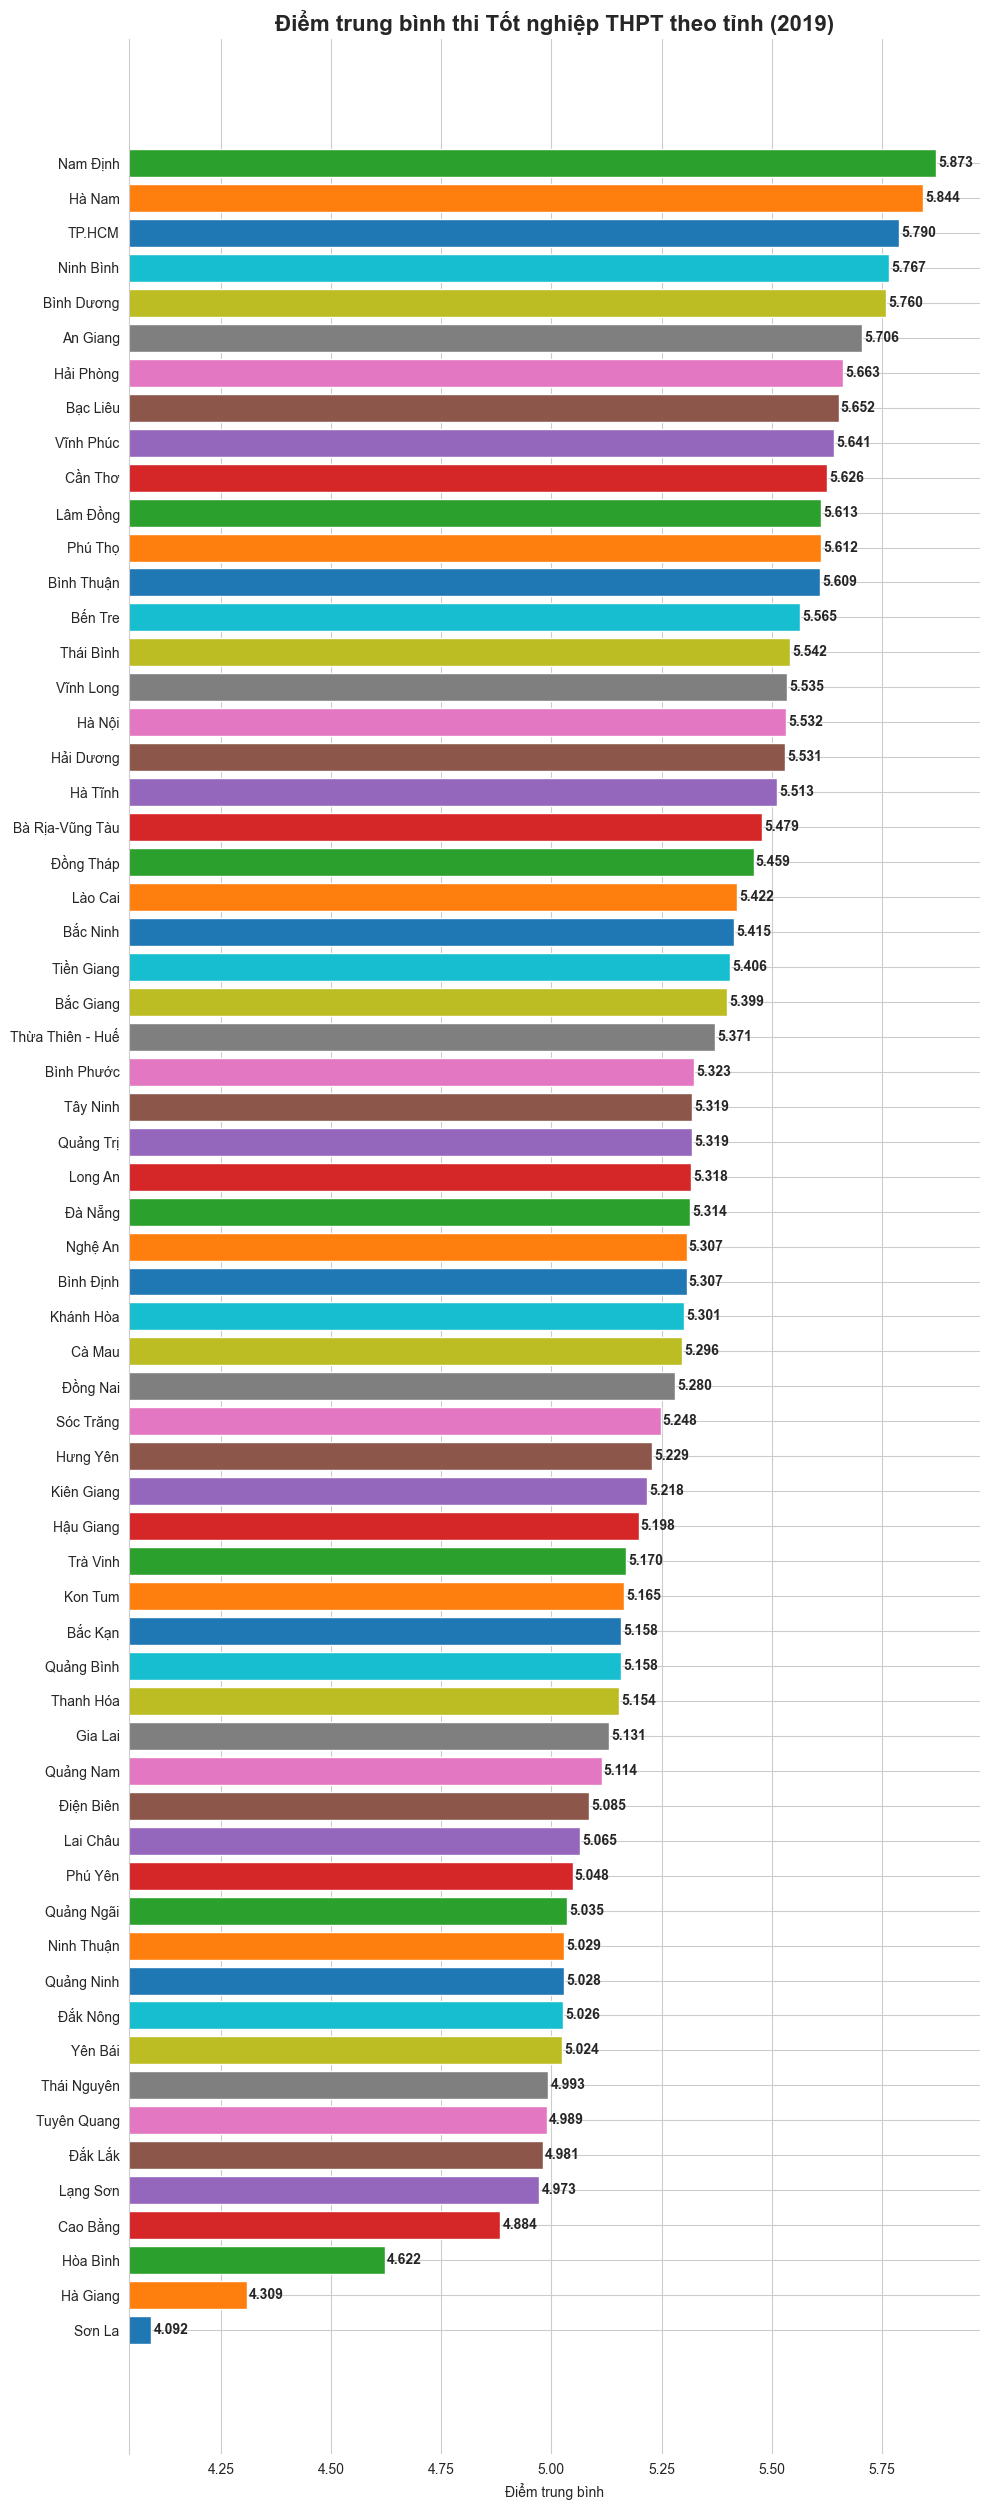

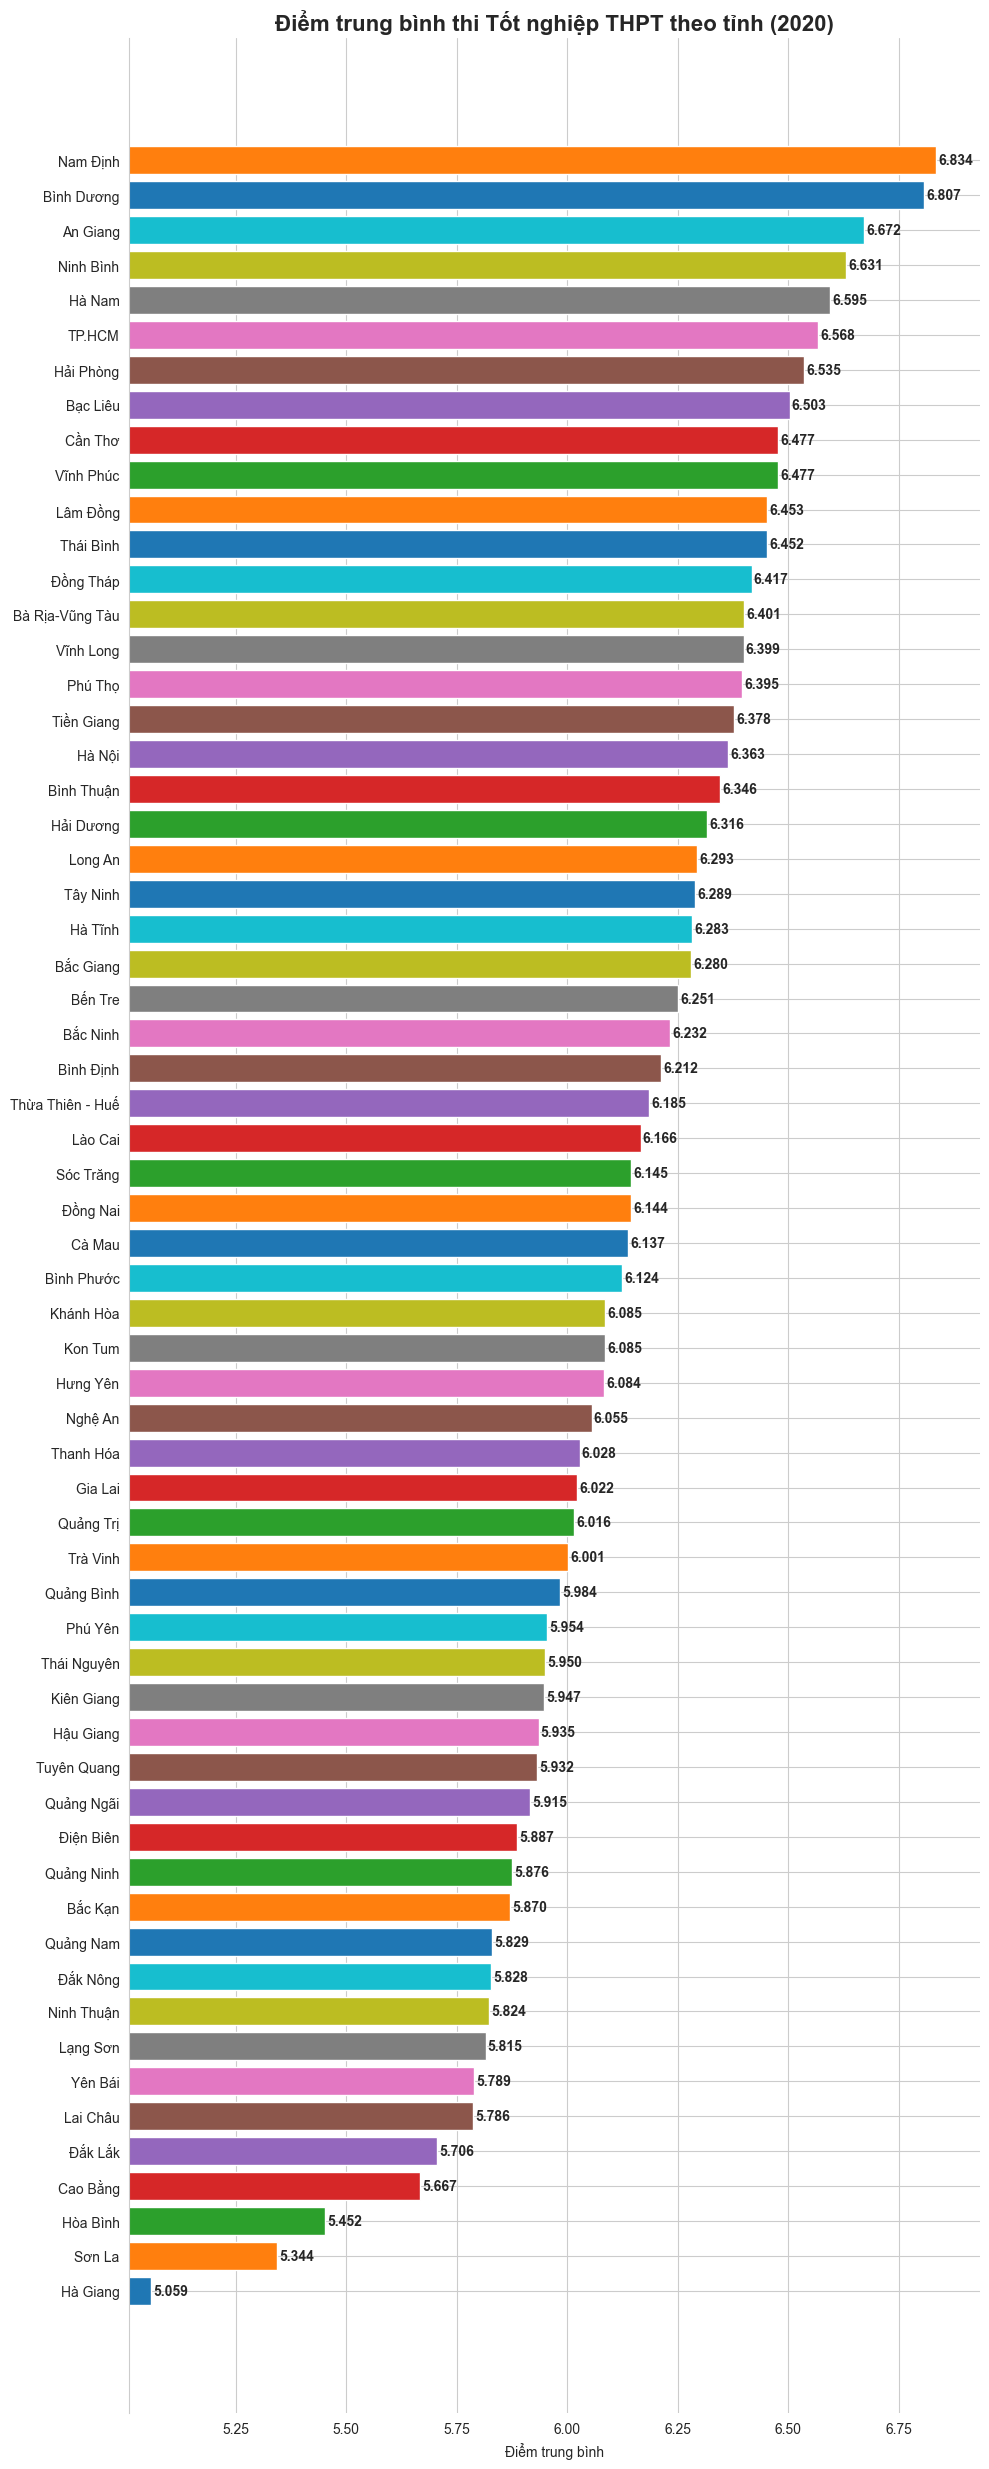

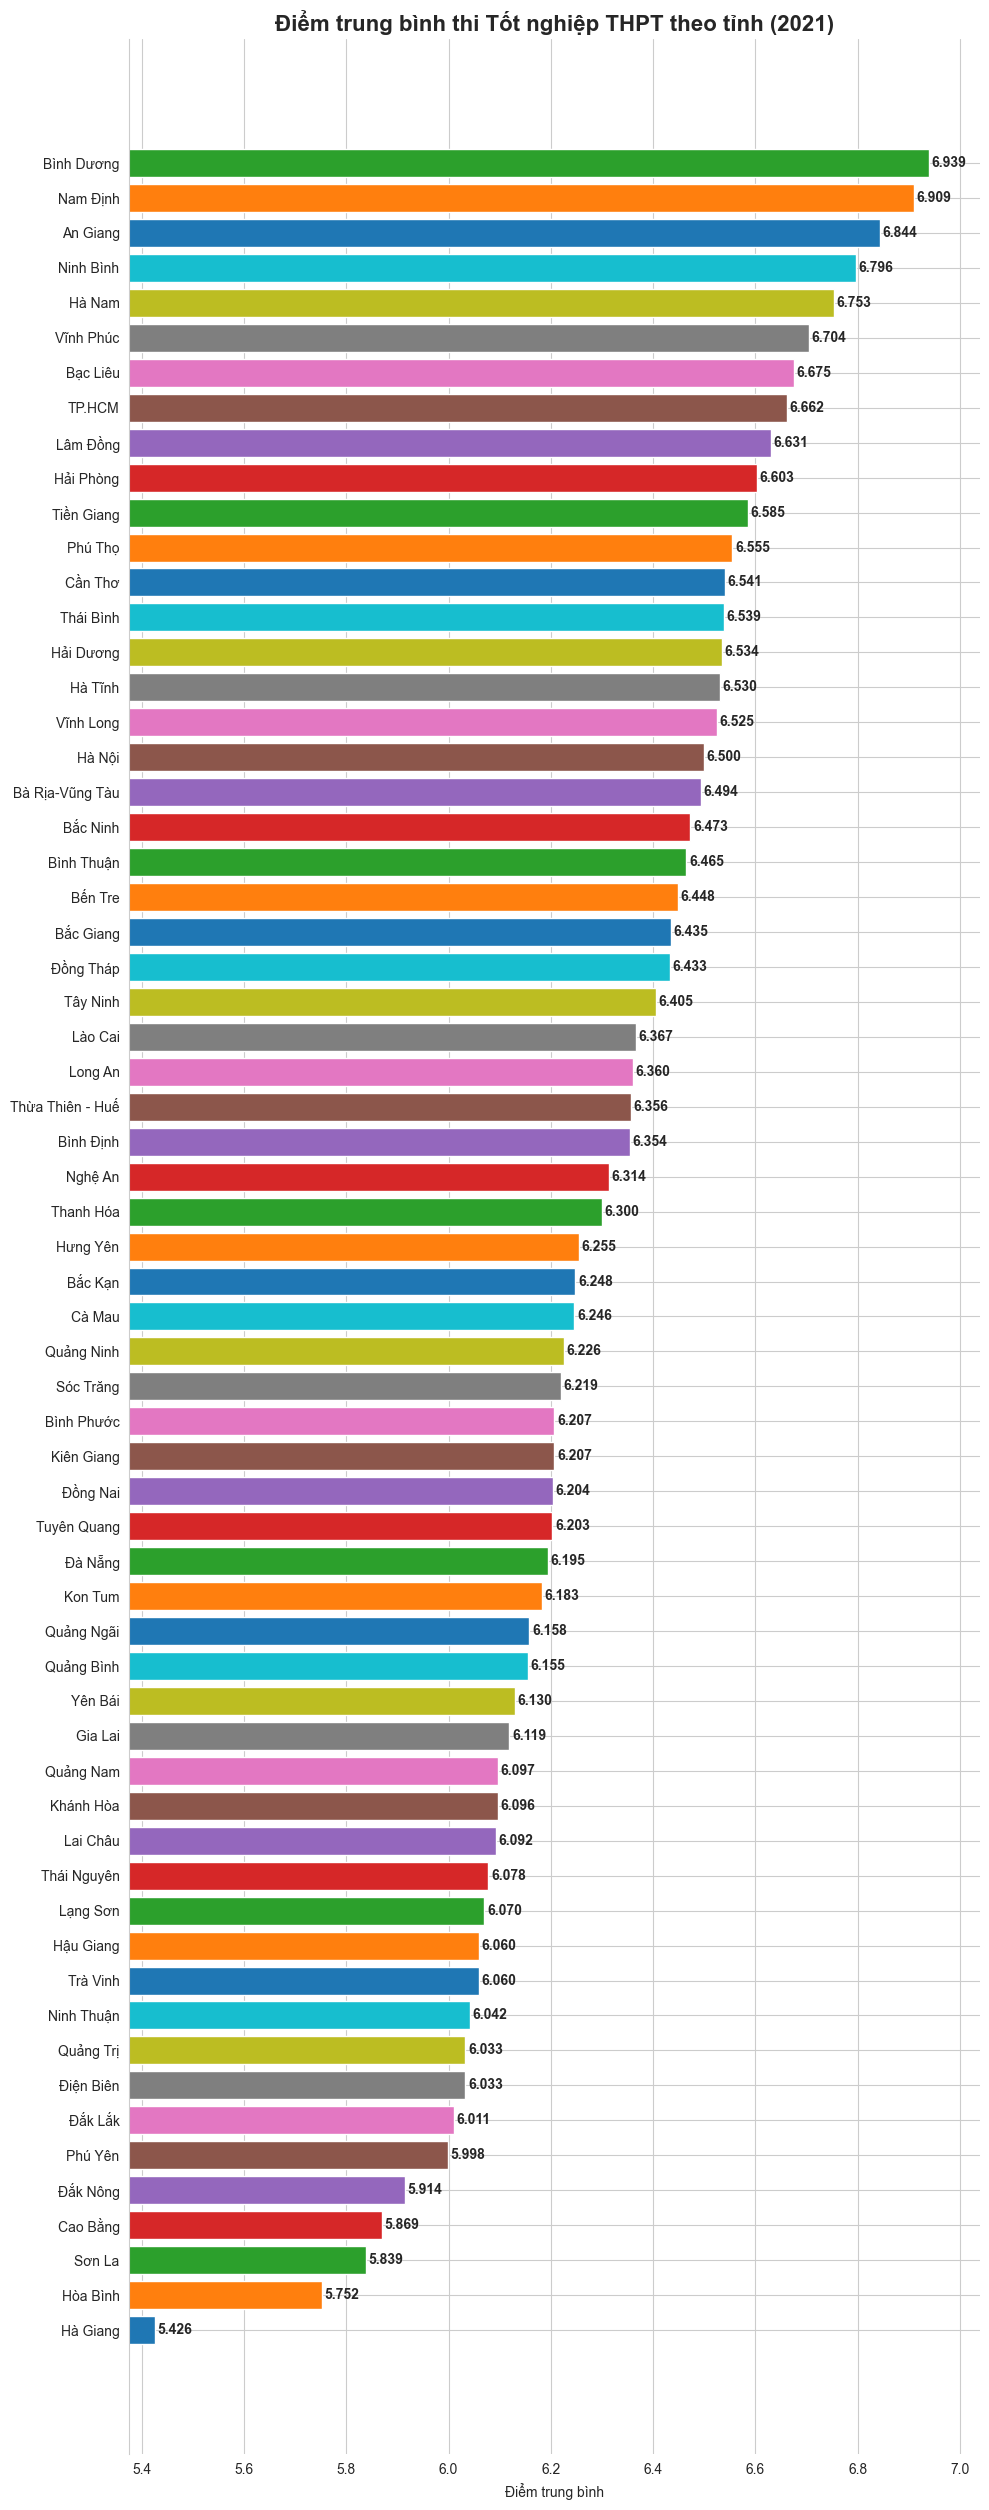

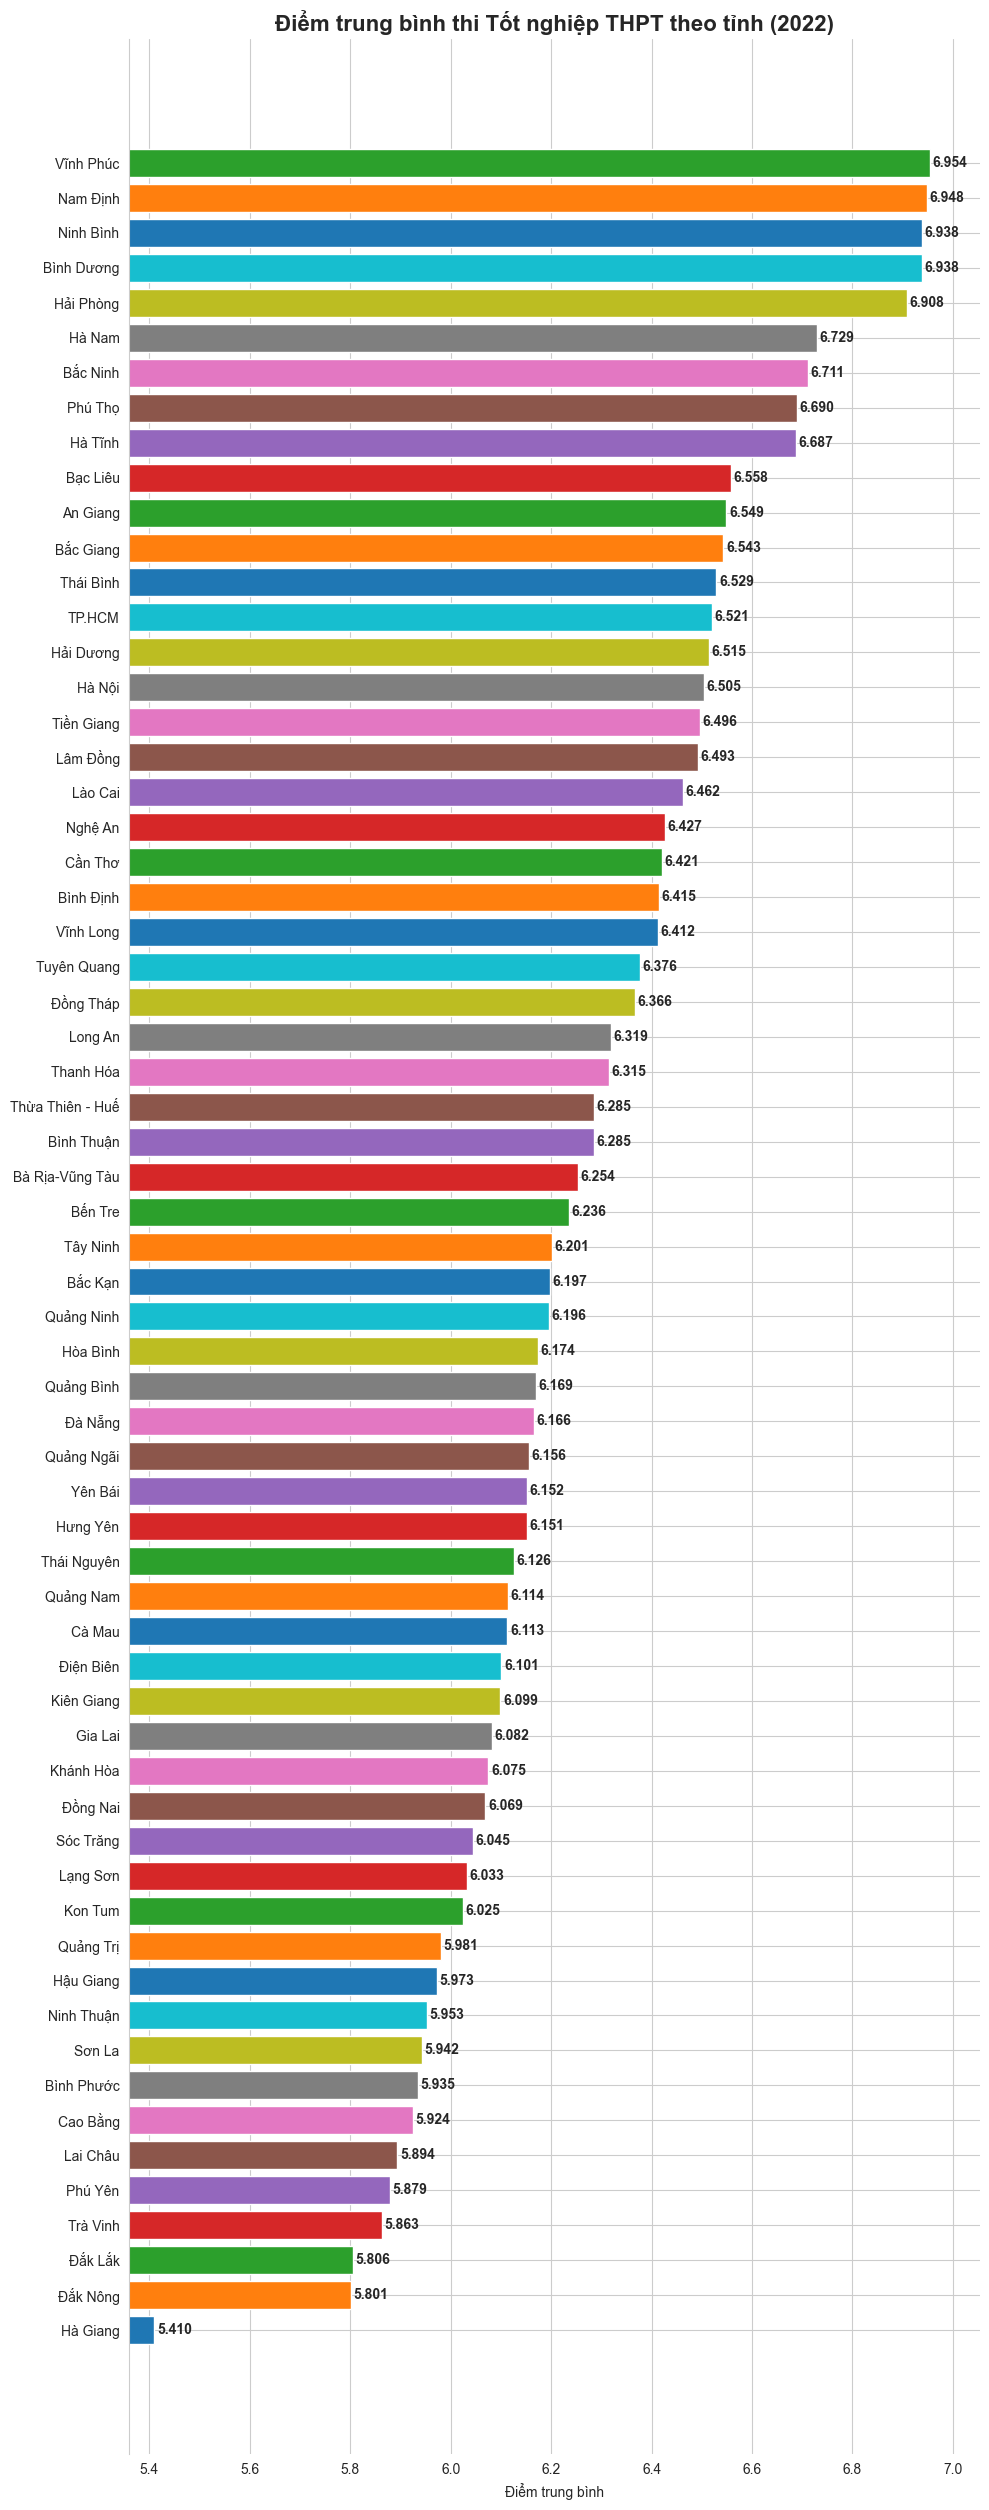

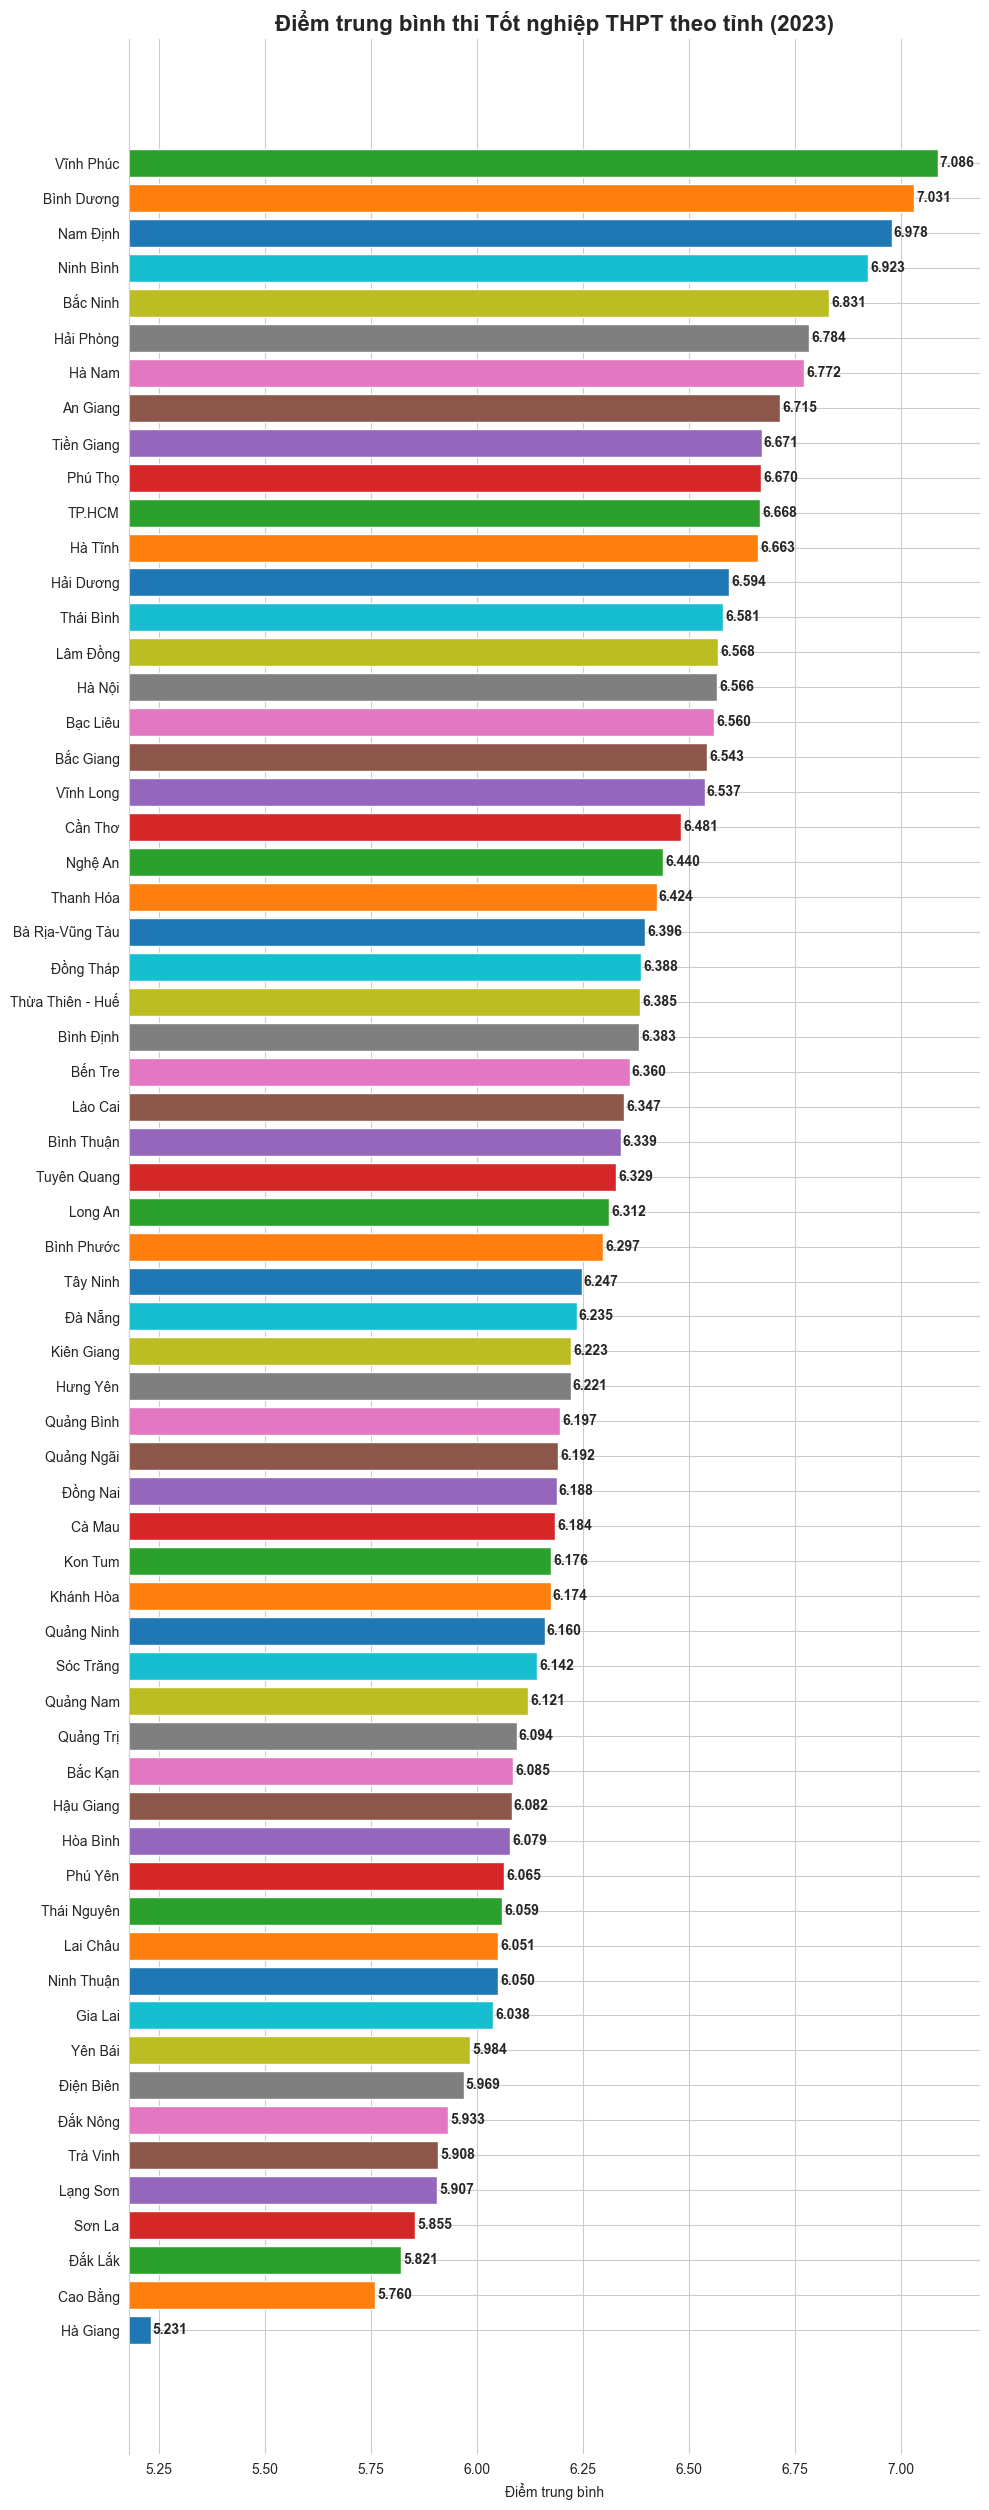

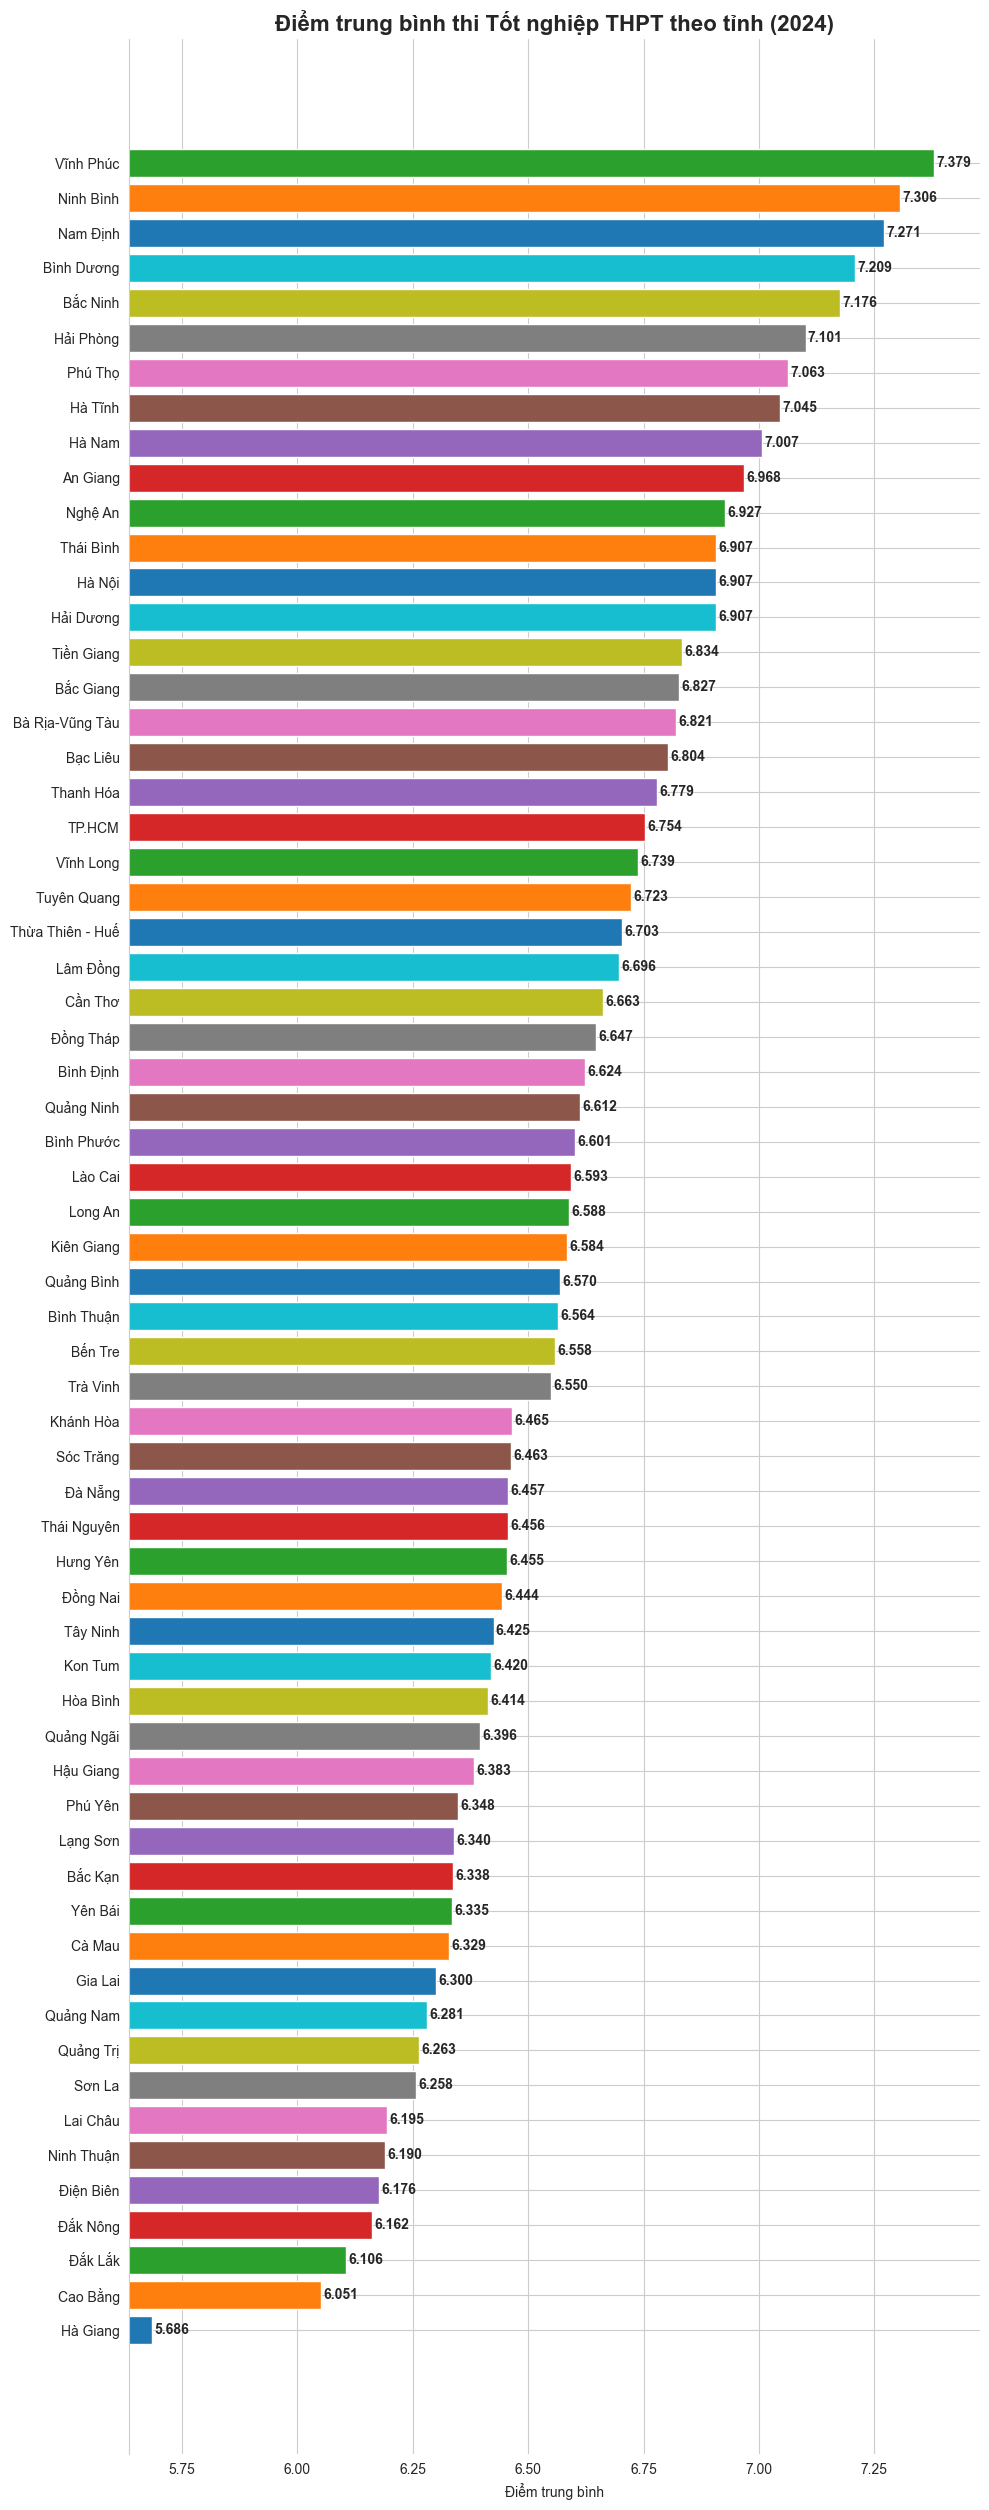

In [2]:
# --- VÒNG LẶP TÍNH TOÁN VÀ VISUALIZATION XẾP HẠNG TỪNG NĂM (63 TỈNH) ---
for nam in danh_sach_nam:
    # Tạo đường dẫn trỏ sang thư mục data
    path_csv = os.path.join(project_root, 'data', f'diem_thi_toan_quoc_{nam}.csv')
    path_json = os.path.join(project_root, 'data', 'ma_tinh.json')
    path_res_csv = os.path.join(project_root, 'data',f'diem_trung_binh_{nam}.csv' )
    path_res_png = os.path.join(charts_dir, f'ranking_{nam}_chart.png' )

    if os.path.exists(path_csv):
        
        # 1. TÍNH TOÁN 
        if not os.path.exists(path_res_csv):
            print(f"⏳ Tính toán Điểm TB năm {nam}...")
            # calculate_average_score(nam_thi=nam, file_input=path_csv, file_output = path_res_csv, file_tinh=path_json)
        
        # 2. GỌI HÀM VISUALIZATION (Vẽ biểu đồ xếp hạng từng năm)
        if os.path.exists(path_res_csv):
            print(f"📊 Bắt đầu tạo biểu đồ xếp hạng cho năm {nam}...")
            visualize_average_score_ranking(
                file_input_csv=path_res_csv, 
                nam_thi=nam, 
                file_output_png=path_res_png
            )
            print(f"Hoàn thành biểu đồ xếp hạng năm {nam}.\n")
        else:
            print(f"⚠️ Không thể tạo biểu đồ năm {nam} vì thiếu file CSV đã tính toán.")
            
    else:
        print(f"⚠️ Không tìm thấy file dữ liệu gốc năm {nam} tại: {path_csv}")

print("✅ Hoàn tất Visualization Xếp hạng Từng năm (63 tỉnh).")

### **4.2 Biểu đồ top 10 tỉnh thành có thứ hạng cao từ năm 2019->2024**

- **Câu hỏi:** Thứ hạng của 10 tỉnh/thành có điểm trung bình cao nhất thay đổi như thế nào qua các năm (2019–2024)?
- **Ý nghĩa:** Biểu đồ giúp theo dõi sự lên xuống thứ hạng của Top 10 tỉnh/thành điểm cao nhất qua các năm và cho thấy tỉnh nào giữ phong độ, tỉnh nào tăng/giảm mạnh.

--- TOP 10 CAO NHẤT (Rank 1 -> 10) ---


,Tỉnh/Thành phố,Thứ hạng 2019,Thứ hạng 2020,Thứ hạng 2021,Thứ hạng 2022,Thứ hạng 2023,Thứ hạng 2024
0,Vĩnh Phúc,9,10,6,1,1,1
1,Ninh Bình,4,4,4,3,4,2
2,Nam Định,1,1,2,2,3,3
3,Bình Dương,5,2,1,4,2,4
4,Bắc Ninh,23,26,20,7,5,5
5,Hải Phòng,7,7,10,5,6,6
6,Phú Thọ,12,16,12,8,10,7
7,Hà Tĩnh,19,23,16,9,12,8
8,Hà Nam,2,5,5,6,7,9
9,An Giang,6,3,3,11,8,10


📊 Bắt đầu tạo biểu đồ Hành trình Top 10 Cao nhất...
Đã tạo biểu đồ hành trình: c:\Users\MSI TUAN\Downloads\DS2\introduction-to-data-science\charts\top10_best_journey.png


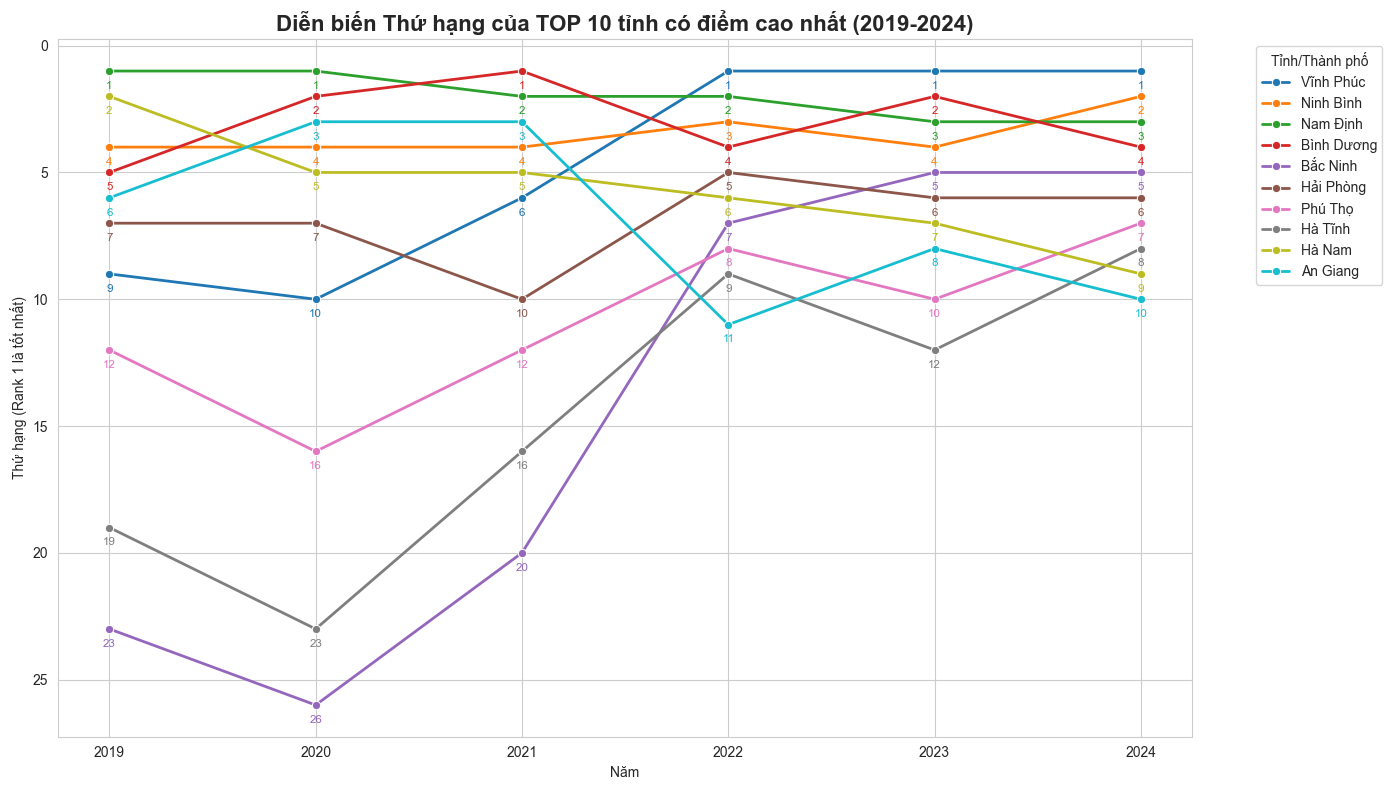

✅ Hoàn tất biểu đồ Hành trình Top 10 Cao nhất.


In [2]:
# Lấy Top 10 tỉnh có điểm cao nhất (Rank thấp nhất)
df_top_best = create_ranking_journey_table(
    project_root=project_root,
    list_years=danh_sach_nam,
    target_year=target_year,
    top_n=10,
    is_top_n_best=True
)

# Xóa Index thừa và hiển thị
df_top_best = df_top_best.reset_index(drop=True)

# Loại bỏ cột Index cũ nếu nó bị giữ lại dưới dạng cột không tên
if df_top_best.columns[0] != 'Tỉnh/Thành phố':
    df_top_best = df_top_best.iloc[:, 1:]
    
df_top_best_clean = clean_rank_to_int(df_top_best)
print("--- TOP 10 CAO NHẤT (Rank 1 -> 10) ---")
display(df_top_best_clean)

# Visualization Hành trình Thứ hạng
custom_title_1 = "Diễn biến Thứ hạng của TOP 10 tỉnh có điểm cao nhất (2019-2024)"
file_path_best = os.path.join(charts_dir, 'top10_best_journey.png')

print("📊 Bắt đầu tạo biểu đồ Hành trình Top 10 Cao nhất...")
visualize_ranking_journey(
    df_ranking_journey=df_top_best,
    custom_title=custom_title_1,
    file_output_png=file_path_best
)
print("✅ Hoàn tất biểu đồ Hành trình Top 10 Cao nhất.")

### **4.3 Biểu đồ top 10 tỉnh thành có thứ hạng thấp từ năm 2019->2024**

- **Câu hỏi:** Thứ hạng của 10 tỉnh/thành có điểm trung bình thấp nhất thay đổi như thế nào qua các năm (2019–2024)?
- **Ý nghĩa:** Biểu đồ cho thấy sự thay đổi thứ hạng của 10 tỉnh có điểm trung bình thấp nhất qua các năm, giúp nhận ra tỉnh nào cải thiện và tỉnh nào tiếp tục xếp cuối bảng.

--- TOP 10 THẤP NHẤT (Rank 54 -> 63) ---


,Tỉnh/Thành phố,Thứ hạng 2019,Thứ hạng 2020,Thứ hạng 2021,Thứ hạng 2022,Thứ hạng 2023,Thứ hạng 2024
0,Hà Giang,62,62,63,63,63,63
1,Cao Bằng,60,59,60,57,62,62
2,Đắk Lắk,58,58,57,61,61,61
3,Đắk Nông,54,53,59,62,57,60
4,Điện Biên,48,49,56,44,56,59
5,Ninh Thuận,52,54,54,54,53,58
6,Lai Châu,49,57,49,58,52,57
7,Sơn La,63,61,61,55,60,56
8,Quảng Trị,29,40,55,52,46,55
9,Quảng Nam,47,52,47,42,45,54


📊 Bắt đầu tạo biểu đồ Hành trình Top 10 Thấp nhất...
Đã tạo biểu đồ hành trình: c:\Users\MSI TUAN\Downloads\DS2\introduction-to-data-science\charts\top10_worst_journey.png


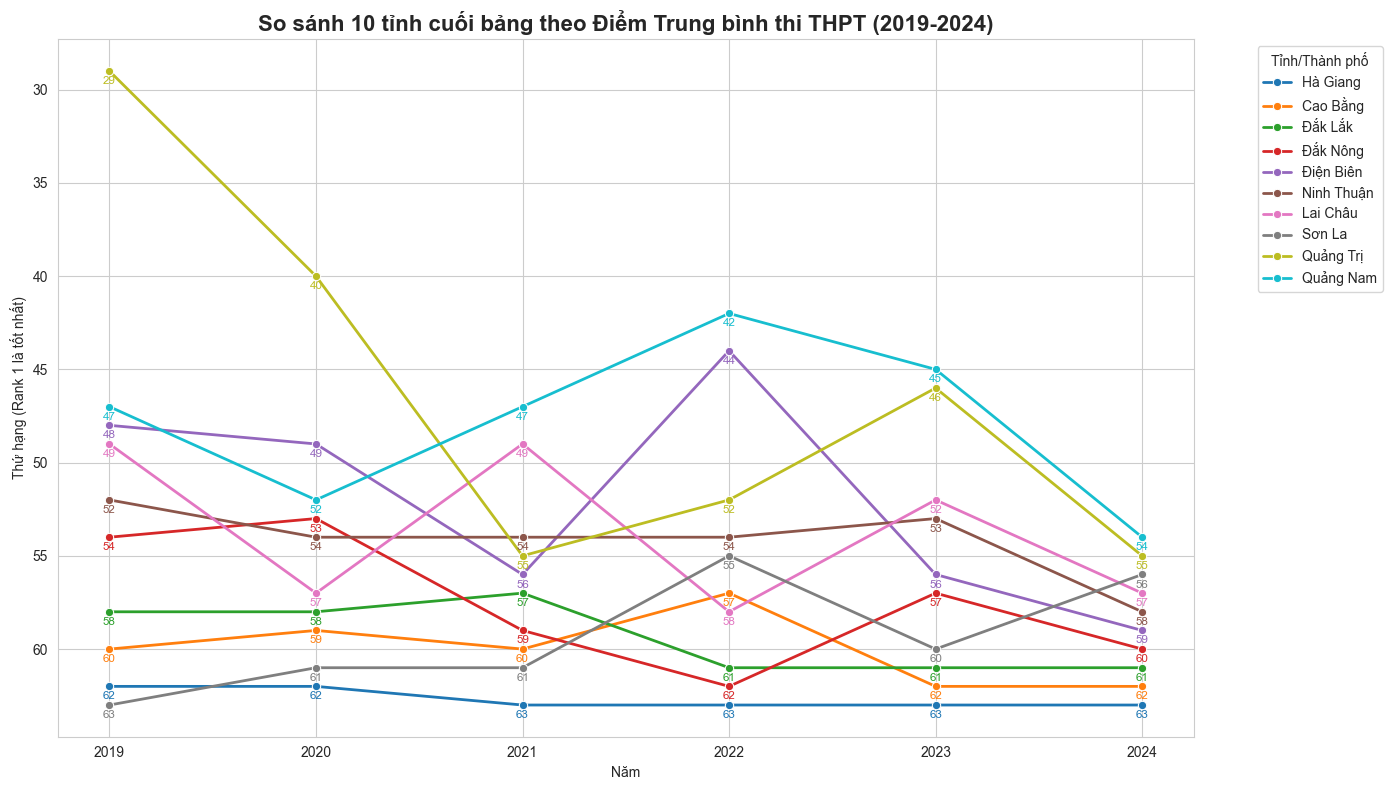

✅ Hoàn tất biểu đồ Hành trình Top 10 Thấp nhất.

🎉 Toàn bộ quy trình đã hoàn tất!


In [3]:
# Lấy Top 10 tỉnh có điểm thấp nhất (Rank cao nhất)
df_top_worst = create_ranking_journey_table(
    project_root=project_root,
    list_years=danh_sach_nam,
    target_year=target_year,
    top_n=10,
    is_top_n_best=False 
)

# Xóa Index thừa và hiển thị
df_top_worst = df_top_worst.reset_index(drop=True)

# Loại bỏ cột Index cũ nếu nó bị giữ lại dưới dạng cột không tên
if df_top_worst.columns[0] != 'Tỉnh/Thành phố':
    df_top_worst = df_top_worst.iloc[:, 1:]
    
df_top_worst_clean = clean_rank_to_int(df_top_worst)
print("--- TOP 10 THẤP NHẤT (Rank 54 -> 63) ---")
display(df_top_worst_clean)

# Visualization Hành trình Thứ hạng
custom_title_2 = "So sánh 10 tỉnh cuối bảng theo Điểm Trung bình thi THPT (2019-2024)"
file_path_worst = os.path.join(charts_dir, 'top10_worst_journey.png')

print("📊 Bắt đầu tạo biểu đồ Hành trình Top 10 Thấp nhất...")
visualize_ranking_journey(
    df_ranking_journey=df_top_worst,
    custom_title=custom_title_2,
    file_output_png=file_path_worst
)
print("✅ Hoàn tất biểu đồ Hành trình Top 10 Thấp nhất.")

print("\n🎉 Toàn bộ quy trình đã hoàn tất!")

### **4.4 Biểu so sánh điểm các khối thi năm 2019->2024**
- **Câu hỏi:** Độ phân hóa của đề thi qua các năm có ổn định không, hay có năm nào đề quá dễ/quá khó khiến phổ điểm bị lệch hẳn về một phía?
- **Ý nghĩa:** Dự báo điểm chuẩn Đại học: Sự dịch chuyển của phổ điểm là chỉ báo quan trọng nhất để dự đoán điểm chuẩn. Nếu đường phổ điểm dịch sang phải (điểm cao hơn), điểm chuẩn năm đó chắc chắn sẽ tăng và ngược lại.

In [8]:
import sys
import os
import mplcursors
import pandas as pd
from pathlib import Path

# Cấu hình đường dẫn để tìm thấy thư mục 'src'
current_dir = Path.cwd()
PROJECT_ROOT = current_dir.parent  # Lùi ra 1 cấp để thấy folder src

if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT))

# Import các hàm từ file src/...
from src.so_sanh_pho_diem_theo_khoi_19_24 import (
    load_score_files,
    load_combinations,
    calc_combination_scores,
    build_all_counts,
    plot_and_save_khoi
)

# BƯỚC 3: Chạy code chính của bạn

# 1. Thiết lập tham số
# Dùng PROJECT_ROOT để đường dẫn chính xác tuyệt đối
DATA_DIR = PROJECT_ROOT / "data"
JSON_PATH = DATA_DIR / "to_hop.json"
SAVE_DIR = PROJECT_ROOT / "charts" / "so_sanh_pho_diem_theo_khoi"

YEARS = [2019, 2020, 2021, 2022, 2023, 2024]
TARGET_KHOI = ["A00", "A01", "B00", "C00", "D01", "D07"]

# 2. Đọc dữ liệu
print("\n=== BẮT ĐẦU QUY TRÌNH ===")
# Chuyển Path object sang string vì hàm load_score_files của bạn có thể dùng os.path.join
df = load_score_files(str(DATA_DIR), years=YEARS)


# 3. Load tổ hợp và tính toán
combo = load_combinations(str(JSON_PATH))
print("✔ Đã load file JSON tổ hợp.")

print("⏳ Đang tính điểm tổ hợp (có thể mất vài giây)...")
pho_diem = calc_combination_scores(df, combo)

print("⏳ Đang thống kê số lượng theo mốc điểm...")
count_table = build_all_counts(pho_diem)

# 4. Vẽ biểu đồ
print("=== ĐANG VẼ BIỂU ĐỒ ===")
for khoi in TARGET_KHOI:
    if khoi in combo:
        plot_and_save_khoi(count_table, khoi, str(SAVE_DIR))
    else:
        print(f"[Cảnh báo] Khối {khoi} không có trong file cấu hình JSON.")


=== BẮT ĐẦU QUY TRÌNH ===
Reading: d:\2025-2026-HKI\IntroduceData\Task_4\introduction-to-data-science\data\diem_thi_2019_new.csv
Reading: d:\2025-2026-HKI\IntroduceData\Task_4\introduction-to-data-science\data\diem_thi_2020_new.csv
Reading: d:\2025-2026-HKI\IntroduceData\Task_4\introduction-to-data-science\data\diem_thi_2021_new.csv
Reading: d:\2025-2026-HKI\IntroduceData\Task_4\introduction-to-data-science\data\diem_thi_2022_new.csv
Reading: d:\2025-2026-HKI\IntroduceData\Task_4\introduction-to-data-science\data\diem_thi_2023_new.csv
Reading: d:\2025-2026-HKI\IntroduceData\Task_4\introduction-to-data-science\data\diem_thi_2024_new.csv
✔ Đã load file JSON tổ hợp.
⏳ Đang tính điểm tổ hợp (có thể mất vài giây)...
⏳ Đang thống kê số lượng theo mốc điểm...
=== ĐANG VẼ BIỂU ĐỒ ===
✔ Đã lưu biểu đồ: d:\2025-2026-HKI\IntroduceData\Task_4\introduction-to-data-science\charts\so_sanh_pho_diem_theo_khoi\khoi_A00.png
✔ Đã lưu biểu đồ: d:\2025-2026-HKI\IntroduceData\Task_4\introduction-to-data-sci

### **4.5 Biểu đồ thanh ngang biểu diễn điểm thi trung bình của các môn**

- **Câu hỏi:** Điểm trung bình của các môn là khác nhau ở các tỉnh
- **Ý nghĩa:** Giúp chúng em nhận xét được điểm trung bình của từng môn hầu như là khác nhau ở các tỉnh thành khác nhau. Điều này chứng tỏ rằng sự khác biệt về kết quả học tập ở các địa phương là rất lớn. 

### **Lưu ý: Xem biểu đồ ở thư mục Chart (vì có nhiều biểu đồ nên không biểu diễn trong Notebook)**

In [7]:
print(f"--- BẮT ĐẦU XỬ LÝ VÀ VISUALIZATION ĐIỂM TB TỪNG MÔN QUA NHIỀU NĂM ---")

# --- 4. VÒNG LẶP XỬ LÝ (NĂM VÀ MÔN HỌC) ---

for nam in danh_sach_nam:
    nam_str = str(nam)
    # --- Thiết lập Đường dẫn ---
    path_csv_input = os.path.join(project_root, 'data', f'diem_thi_toan_quoc_{nam_str}.csv')
    path_json_tinh = os.path.join(project_root, 'data', 'ma_tinh.json')
    path_res_csv = os.path.join(project_root, 'data', f'diem_tb_mon_{nam_str}.csv')

    if os.path.exists(path_csv_input):
        
        df_mon = None # Khởi tạo DataFrame điểm TB môn của năm hiện tại
        
        # 1. TÍNH ĐIỂM TRUNG BÌNH TỪNG MÔN (Nếu file kết quả chưa tồn tại)
        if not os.path.exists(path_res_csv):
            print(f"\n⏳ Tính Điểm TB Từng Môn năm {nam_str}...")
            # Hàm trả về DataFrame KHÔNG CÓ NĂM trong tên cột
            df_mon = calculate_average_scores_by_subject(
                nam_thi=nam_str, 
                file_input=path_csv_input, 
                file_output=path_res_csv,
                file_tinh=path_json_tinh
            )
        else:
            # Nếu đã tồn tại, ĐỌC FILE VÀ LÀM SẠCH TÊN CỘT (vì file CSV có năm)
            print(f"\n✅ Bỏ qua tính toán năm {nam_str}, đã tìm thấy file CSV: {path_res_csv}")
            try:
                df_mon_raw = pd.read_csv(path_res_csv)
                # LÀM SẠCH TÊN CỘT: Xóa phần (Năm)
                df_mon = df_mon_raw.rename(columns=lambda col: col.replace(f' ({nam_str})', '') if f' ({nam_str})' in col else col)
            except Exception as e:
                print(f"Lỗi đọc file CSV năm {nam_str}: {e}")
                continue # Bỏ qua năm này

        
        # 2. VISUALIZATION XẾP HẠNG TỪNG MÔN
        if df_mon is not None:
            print(f"\n📊 Bắt đầu tạo biểu đồ xếp hạng TỪNG MÔN năm {nam_str}...")
            
            for subject in all_subjects:
                score_col = f'Điểm TB {subject}'
                
                if score_col in df_mon.columns:
                    # Gọi hàm visualization mới
                    visualize_subject_ranking(
                        df_input=df_mon,
                        subject=subject,
                        nam_thi=nam_str,
                        output_dir=charts_dir # Lưu vào charts/YYYY/
                    )
                # else: (In thông báo bỏ qua nếu cần)

    else:
        print(f"⚠️ Không tìm thấy file dữ liệu gốc năm {nam_str} tại: {path_csv_input}")

print("\n🎉 HOÀN TẤT XỬ LÝ VÀ VISUALIZATION ĐIỂM TRUNG BÌNH TỪNG MÔN QUA NHIỀU NĂM!")

--- BẮT ĐẦU XỬ LÝ VÀ VISUALIZATION ĐIỂM TB TỪNG MÔN QUA NHIỀU NĂM ---

✅ Bỏ qua tính toán năm 2019, đã tìm thấy file CSV: d:\2025-2026-HKI\IntroduceData\FullTask\introduction-to-data-science\data\diem_tb_mon_2019.csv

📊 Bắt đầu tạo biểu đồ xếp hạng TỪNG MÔN năm 2019...
 -> Đã lưu: diem_tb_Toán.png
 -> Đã lưu: diem_tb_Văn.png
 -> Đã lưu: diem_tb_Ngoại ngữ.png
 -> Đã lưu: diem_tb_Lí.png
 -> Đã lưu: diem_tb_Hóa.png
 -> Đã lưu: diem_tb_Sinh.png
 -> Đã lưu: diem_tb_Sử.png
 -> Đã lưu: diem_tb_Địa.png
 -> Đã lưu: diem_tb_GDCD.png

✅ Bỏ qua tính toán năm 2020, đã tìm thấy file CSV: d:\2025-2026-HKI\IntroduceData\FullTask\introduction-to-data-science\data\diem_tb_mon_2020.csv

📊 Bắt đầu tạo biểu đồ xếp hạng TỪNG MÔN năm 2020...
 -> Đã lưu: diem_tb_Toán.png
 -> Đã lưu: diem_tb_Văn.png
 -> Đã lưu: diem_tb_Ngoại ngữ.png
 -> Đã lưu: diem_tb_Lí.png
 -> Đã lưu: diem_tb_Hóa.png
 -> Đã lưu: diem_tb_Sinh.png
 -> Đã lưu: diem_tb_Sử.png
 -> Đã lưu: diem_tb_Địa.png
 -> Đã lưu: diem_tb_GDCD.png

✅ Bỏ qua tí

### **4.6 Biểu đồ nhiệt so sánh số lượng và tỷ lệ thí sinh liệt qua các năm từ 2019-2024**
- **Câu hỏi:** Tình hình thí sinh bị điểm liệt (≤ 1.0 điểm) biến động như thế nào trong giai đoạn 6 năm (2019-2024)?
- **Ý nghĩa:** Việc so sánh song song giữa "Số lượng" và "Tỷ lệ" giúp đánh giá khách quan hơn.

In [7]:
YEARS = [2019, 2020, 2021, 2022, 2023,2024]  
DATA_DIR = Path("../data")           
OUTPUT_DIR = Path(project_root) / 'charts'
OUTPUT_DIR.mkdir(exist_ok=True)
CONFIG_FILE = DATA_DIR / "to_hop.json"
GEOJSON_FILE = DATA_DIR / "vn_new.json"
NGUONG_LIET = 1.0
NGUONG_TO_HOP = 12.5

GEOJSON_OLD = DATA_DIR / "vn.json"
PROVINCE_CSV = DATA_DIR / "province.csv"

for year in YEARS:
        print(f"\n========== NĂM {year} ==========")
    
        data_file = DATA_DIR / f"diem_thi_toan_quoc_{year}.csv"
        year_output_dir = OUTPUT_DIR / str(year)
        year_output_dir.mkdir(parents=True, exist_ok=True)

        if not data_file.exists():
            print(f"BỎ QUA: Không tìm thấy file {data_file.name}")
            continue

        run_full_analysis_and_draw(
            year=year,
            data_file_path=data_file,
            config_file_path=CONFIG_FILE,
            geojson_path=GEOJSON_FILE,
            output_dir=year_output_dir,
            liet_nguong=NGUONG_LIET,

            tohop_nguong=NGUONG_TO_HOP
        )

print("\n HOÀN TẤT PHÂN TÍCH TẤT CẢ CÁC NĂM")


========== NĂM 2019 ==========
Bắt đầu đọc file: diem_thi_toan_quoc_2019.csv
Đã tính toán thống kê thành công.
Đã gộp dữ liệu thống kê vào bản đồ thành công.
ĐÃ LƯU BẢN ĐỒ KÉP: heatmap_dual_2019.png
QUY TRÌNH VẼ BẢN ĐỒ NHIỆT HOÀN TẤT.

========== NĂM 2020 ==========
Bắt đầu đọc file: diem_thi_toan_quoc_2020.csv
Đã tính toán thống kê thành công.
Đã gộp dữ liệu thống kê vào bản đồ thành công.
ĐÃ LƯU BẢN ĐỒ KÉP: heatmap_dual_2020.png
QUY TRÌNH VẼ BẢN ĐỒ NHIỆT HOÀN TẤT.

========== NĂM 2021 ==========
Bắt đầu đọc file: diem_thi_toan_quoc_2021.csv
Đã tính toán thống kê thành công.
Đã gộp dữ liệu thống kê vào bản đồ thành công.
ĐÃ LƯU BẢN ĐỒ KÉP: heatmap_dual_2021.png
QUY TRÌNH VẼ BẢN ĐỒ NHIỆT HOÀN TẤT.

========== NĂM 2022 ==========
Bắt đầu đọc file: diem_thi_toan_quoc_2022.csv
Đã tính toán thống kê thành công.
Đã gộp dữ liệu thống kê vào bản đồ thành công.
ĐÃ LƯU BẢN ĐỒ KÉP: heatmap_dual_2022.png
QUY TRÌNH VẼ BẢN ĐỒ NHIỆT HOÀN TẤT.

========== NĂM 2023 ==========
Bắt đầu đọc file: diem_t

### **4.7 Biểu đồ phân phối điểm của các môn qua các năm từ 2019-2024**
- **Câu hỏi:** Điểm của từng môn được phân bố như thế nào trong giai đoạn 2019–2024? Phân phối điểm có thay đổi, lệch hay dịch chuyển theo thời gian không?
- **Ý nghĩa:** Biểu đồ phân phối điểm từ năm 2019 đến 2024 cho thấy sự thay đổi về mức độ khó, độ phân hóa và xu hướng kết quả thi của từng môn qua các năm. Sự dịch chuyển hoặc thay đổi hình dạng phân phối giúp nhận diện môn nào cải thiện, môn nào giảm sút và năm nào xuất hiện biến động bất thường. Đây là cơ sở quan trọng để đánh giá chất lượng dạy học theo thời gian và đề xuất các giải pháp nâng cao hiệu quả giáo dục.

In [14]:
binned = load_binned_scores(project_root_new / "data/diem_thi_binned_2019_2024.csv")

Vẽ môn: Toán


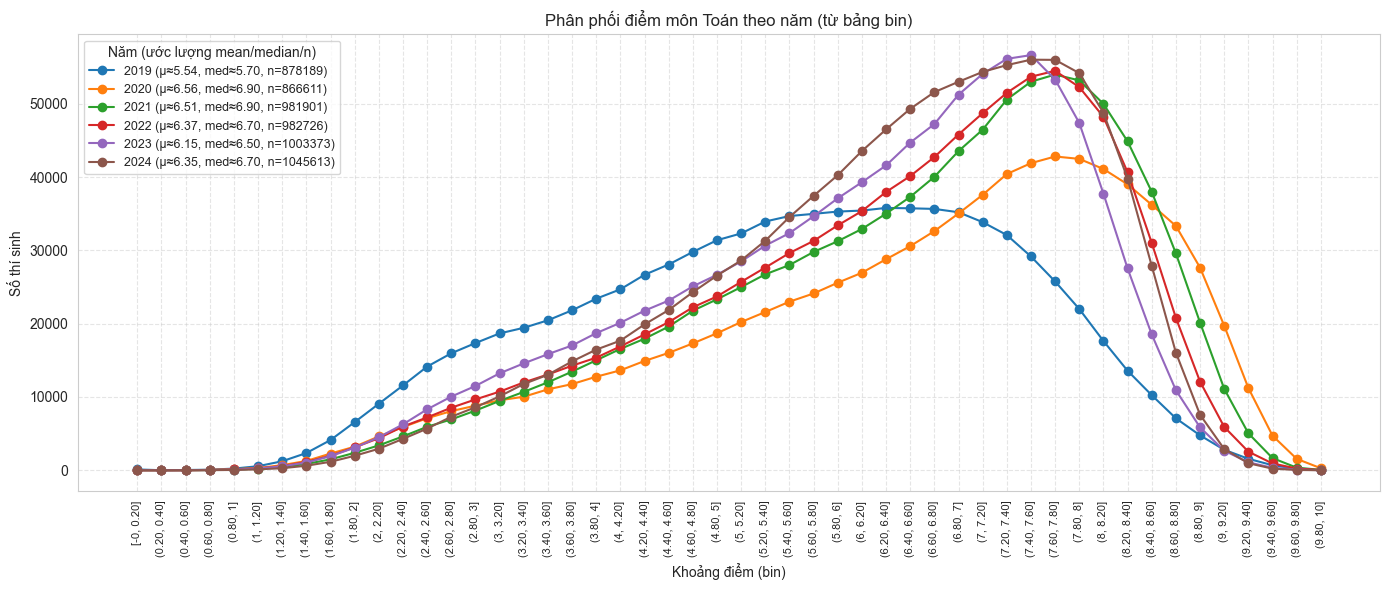

Vẽ môn: Văn


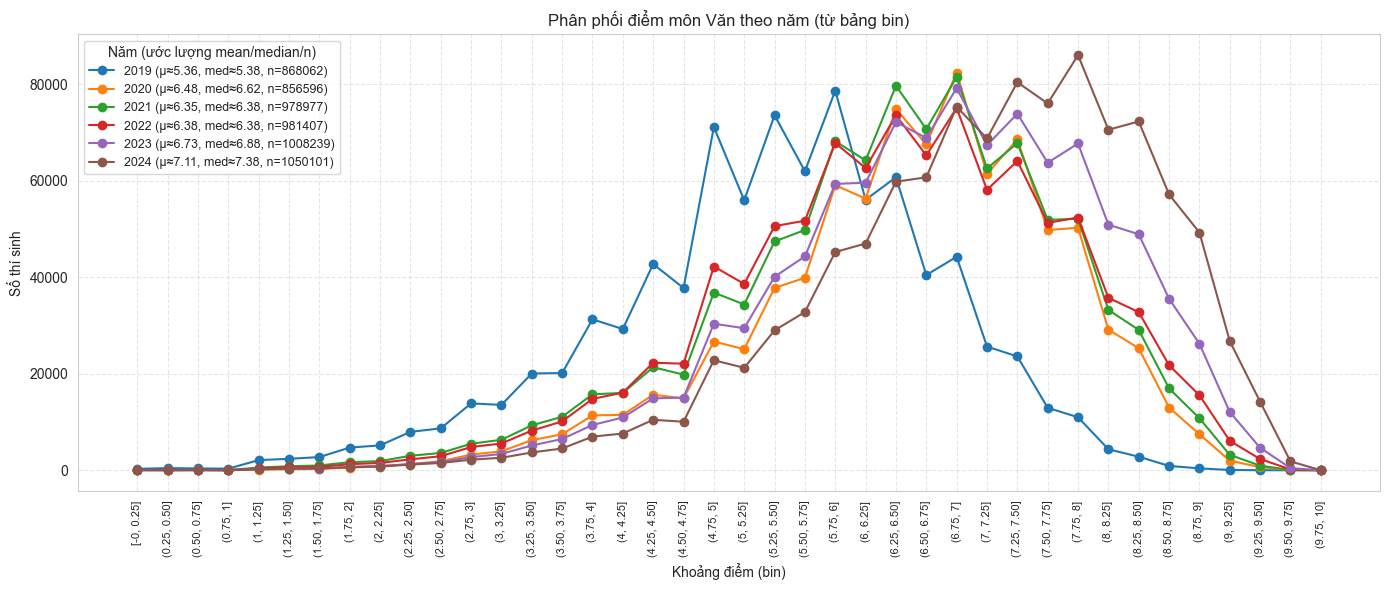

Vẽ môn: Ngoại ngữ


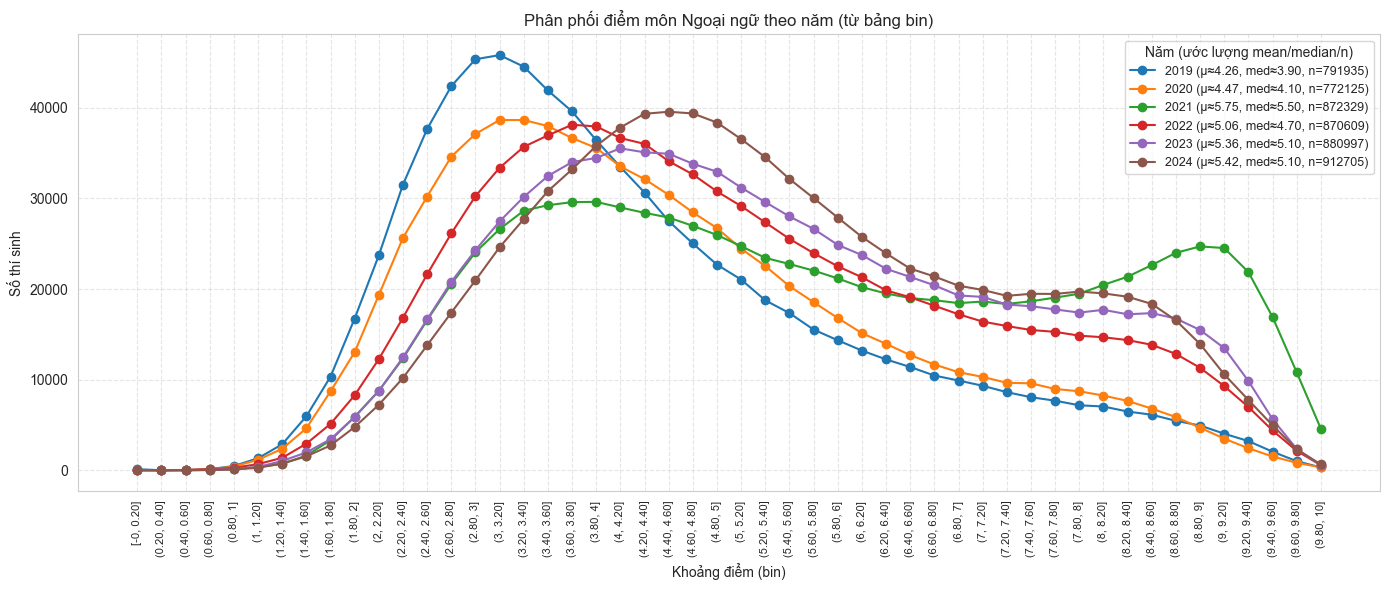

Vẽ môn: Lí


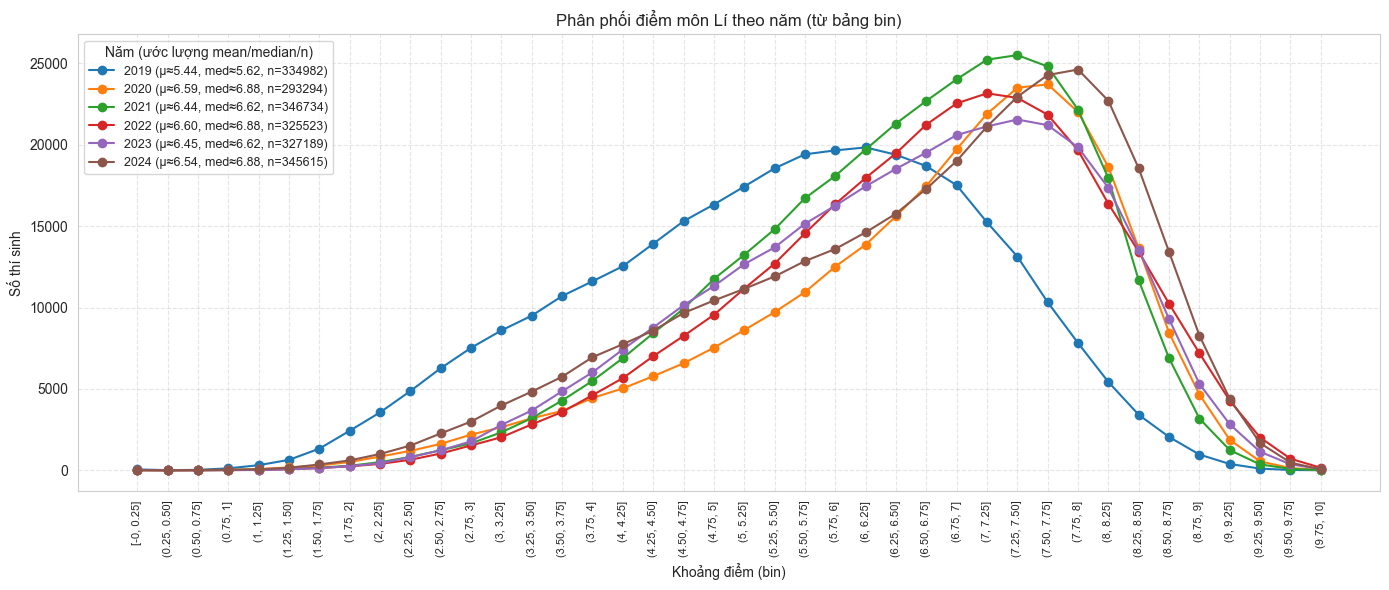

Vẽ môn: Hóa


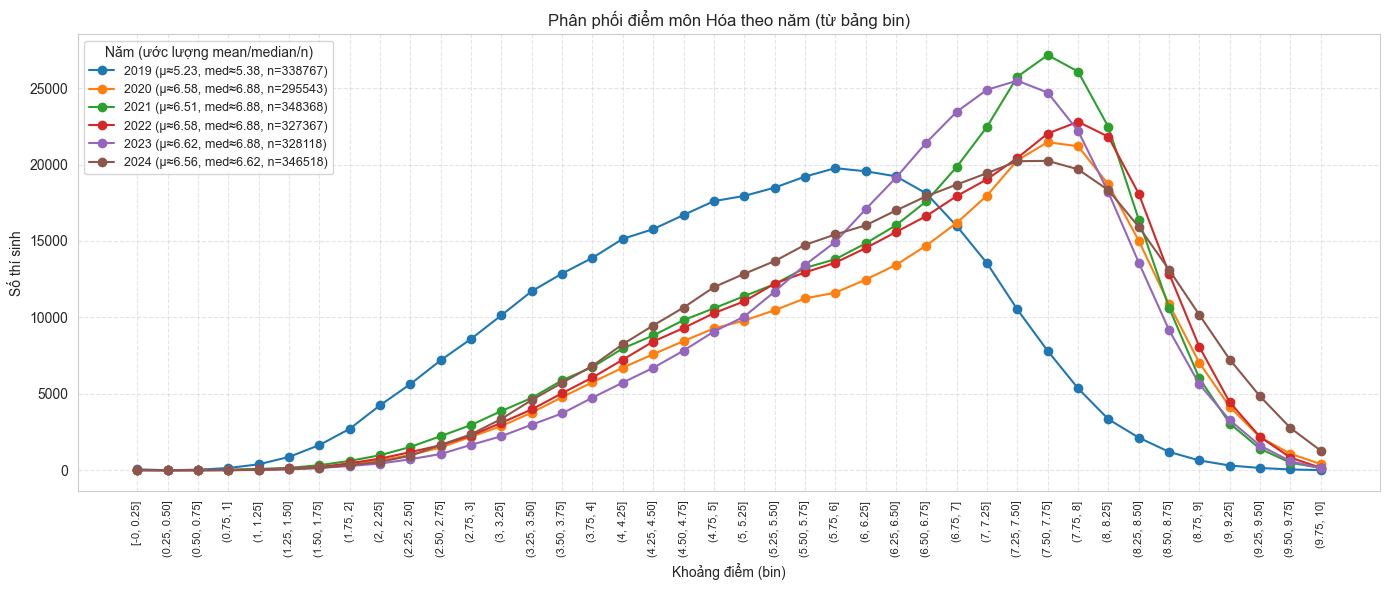

Vẽ môn: Sinh


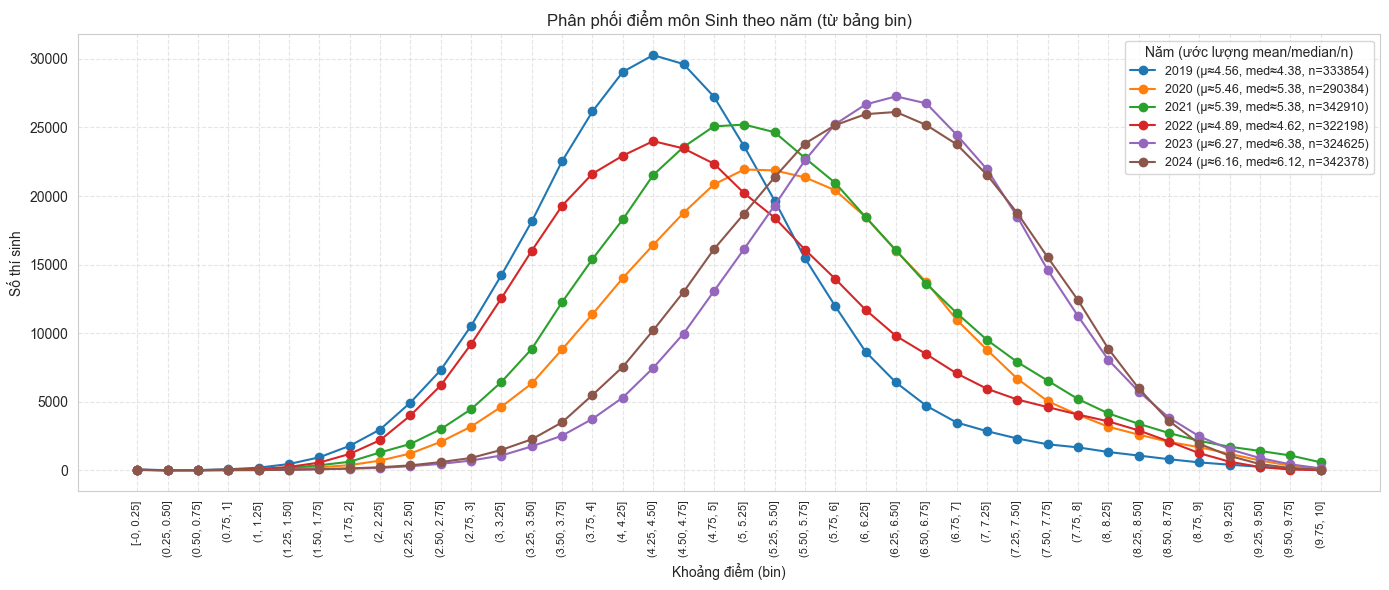

Vẽ môn: Sử


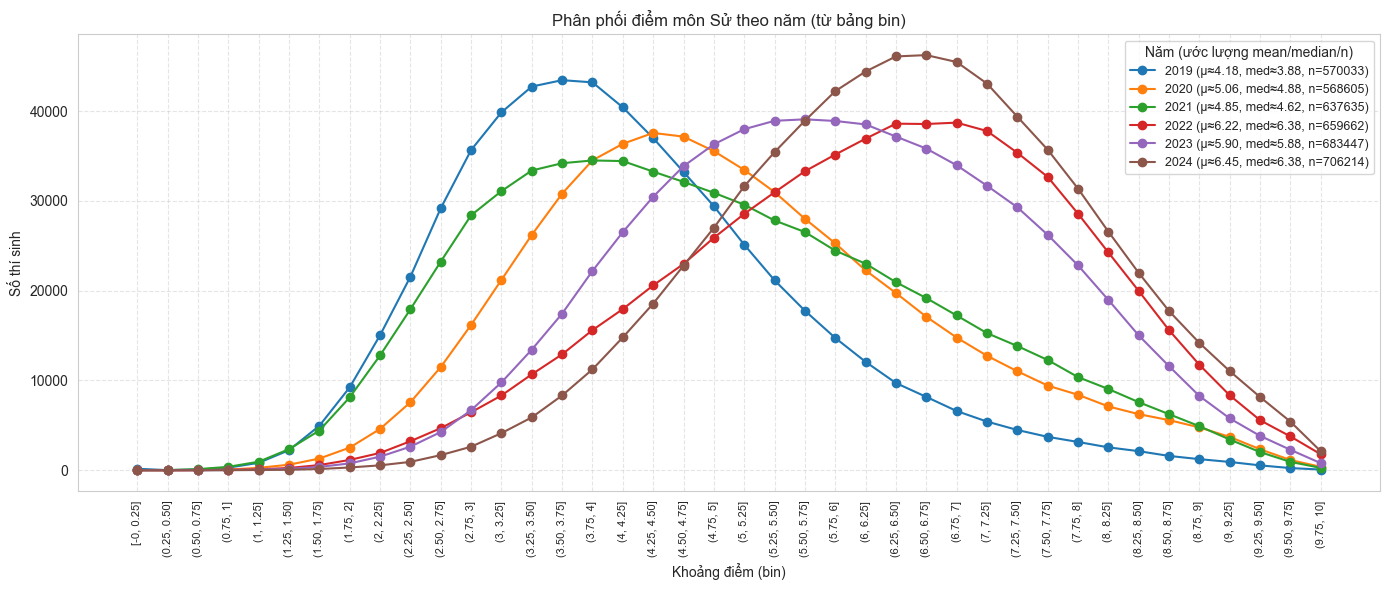

Vẽ môn: Địa


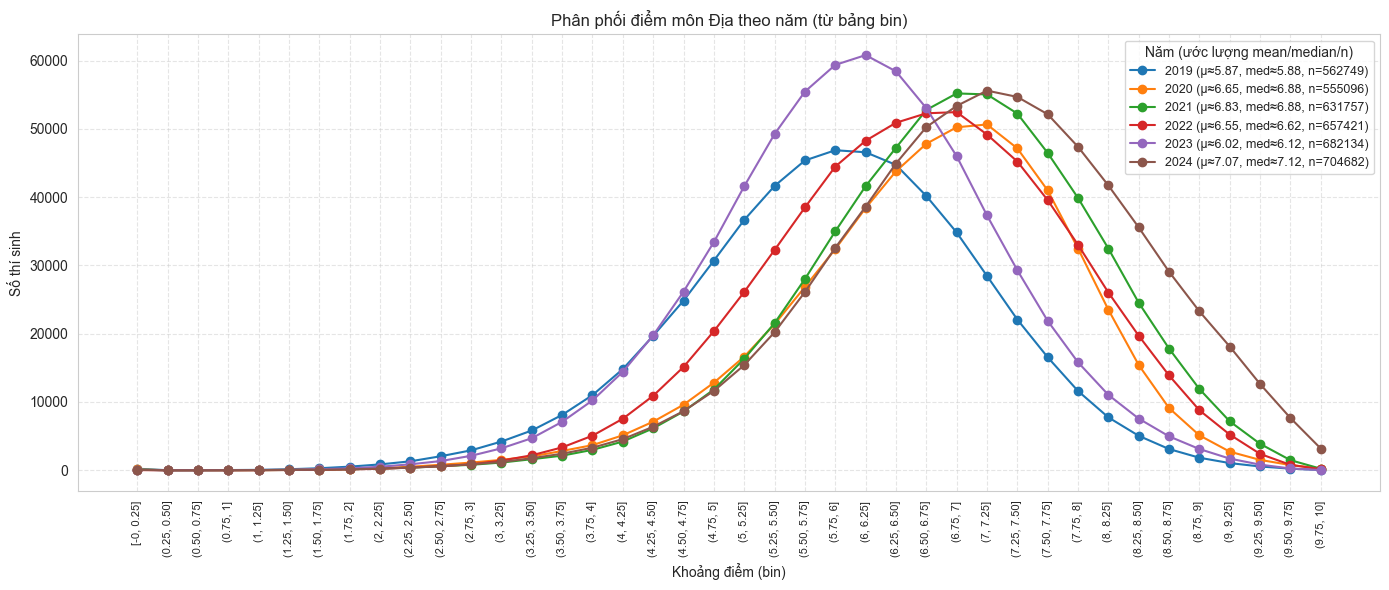

Vẽ môn: GDCD


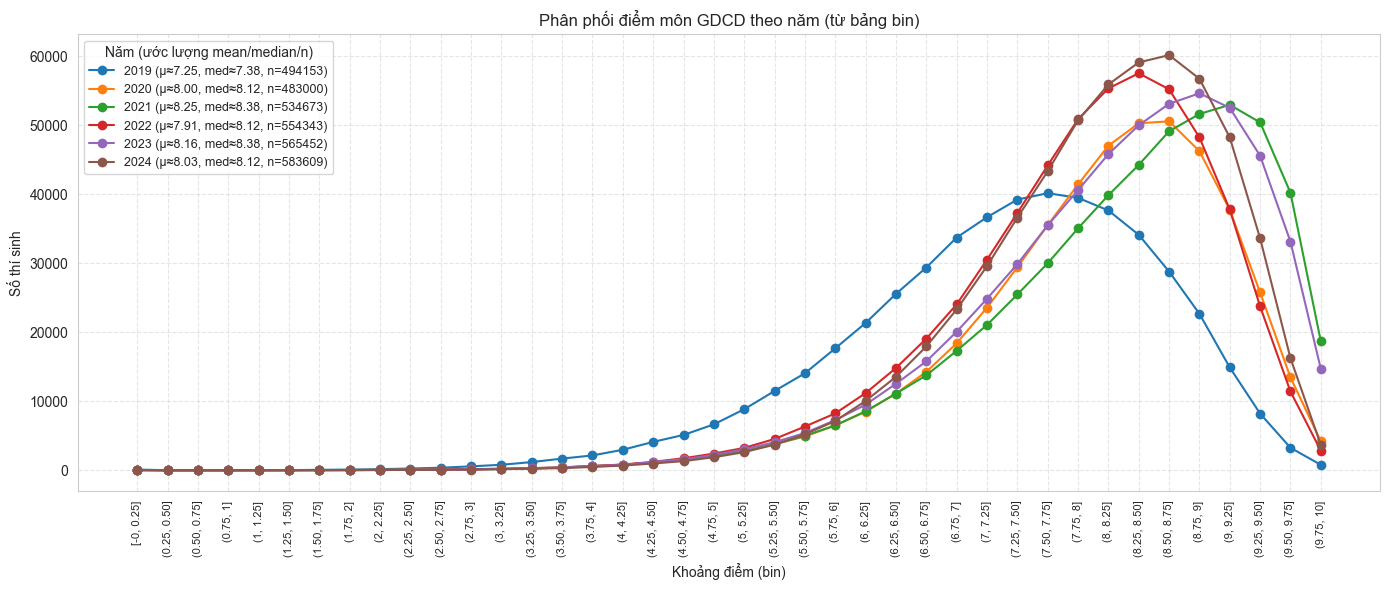

In [16]:
plot_all_subjects_from_binned(binned)